In [105]:
import pandas as pd
import numpy as np

In [106]:
# this only needs to be run once
%load_ext rpy2.ipython

%R library(ggplot2)
%R library(scales)
%R library(png)
%R library(grid)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['grid', 'png', 'scales', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [107]:
df_r = pd.DataFrame({'source':['Reader\'s Digest', 
                                         'Time Magazine', 
                                         'Pitchfork', 
                                         'Harvard Law Review',
                                         'Buzzfeed',
                                         'The Economist',
                              'Youtube comments',
                               'The New Yorker'],
                               'score':[65, 52, int(38.4), 32, 92, 42, 95, 48]})
df_r.loc[df_r['source']!='Pitchfork','highlight'] = 'no'
df_r.loc[df_r['source']=='Pitchfork','highlight'] = 'p4k'
df_r.loc[df_r['source']=='Youtube comments','highlight'] = 'yt'
df_r

,source,score,highlight
0,Reader's Digest,65,no
1,Time Magazine,52,no
2,Pitchfork,38,p4k
3,Harvard Law Review,32,no
4,Buzzfeed,92,no
5,The Economist,42,no
6,Youtube comments,95,yt
7,The New Yorker,48,no


In [108]:
%R -i df_r

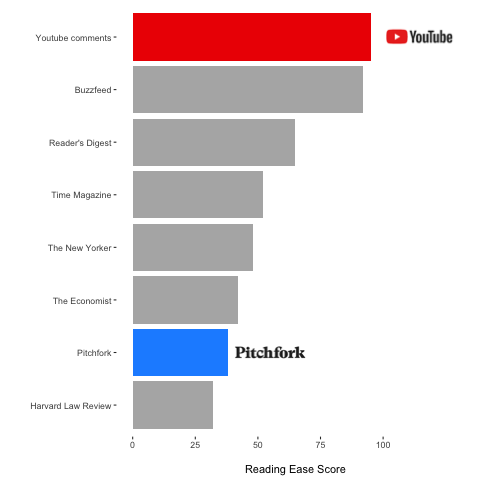

In [109]:
%%R

img_yt <- readPNG("images/youtube.png")
img_p4k <- readPNG("images/pitchfork.png")
g_yt <- rasterGrob(img_yt, interpolate=TRUE)
g_p4k <- rasterGrob(img_p4k, interpolate=TRUE)

(ggplot()
+ geom_bar(aes(x=reorder(source,score),y=score, fill=highlight), data=df_r, stat='identity')
+ scale_fill_manual(values = c('grey70','dodgerblue','red2'))
+ coord_flip()
+ scale_y_continuous(limits = c(0, 130), breaks = seq(0, 100, by = 25))
+ annotation_custom(g_yt, xmin=7.5, xmax=8.5, ymin=100, ymax=130)
+ annotation_custom(g_p4k, xmin=1.5, xmax=2.5, ymin=40, ymax=70)
+ labs(x='\n',
       y='\nReading Ease Score')
+ theme(panel.background=element_blank(),
        legend.position = "none"))

Sources:

- https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests#Flesch_reading_ease
- https://contently.com/2015/01/28/this-surprising-reading-level-analysis-will-change-the-way-you-write/